# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

## Overview
In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).

## Dataset
The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:
1. Text: The content of the blog post. Column name: Data
2. Category: The category to which the blog post belongs. Column name: Labels

### Task-1 Data Exploration and Preprocessing :
1. Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
2. 
Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords
3. 
Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.


In [232]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [233]:
df=pd.read_csv("blogs.csv")

In [236]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [240]:
df["Labels"].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [242]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [244]:
import re
import string
def clean_text(text):
    text= text.lower()
    text=re.sub('\[.*?\]','',text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text=re.sub('\w*\d\w*','',text)
    text=re.sub("[0-9" "]+"," ",text)
    text=re.sub('[‘’“”…]','',text)
    return text

clean=lambda x:clean_text(x)

<>:5: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\['
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\khale\AppData\Local\Temp\ipykernel_16924\2987500816.py:5: SyntaxWarning: invalid escape sequence '\['
  text=re.sub('\[.*?\]','',text)
C:\Users\khale\AppData\Local\Temp\ipykernel_16924\2987500816.py:7: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub('\w*\d\w*','',text)


In [246]:
df['Data']=df.Data.apply(clean)
df.Data

0       path \nfrom  frank odwyer\nnewsgroups altathei...
1       newsgroups altatheism\npath \nfrom bilokcforum...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path \nfrom jbrownbatmanbmdtrwcom\nnewsgroups ...
4       xref cantaloupesrvcscmuedu   \nnewsgroups alta...
                              ...                        
1995    xref cantaloupesrvcscmuedu   \npath \nfrom  fr...
1996    xref cantaloupesrvcscmuedu   \nnewsgroups talk...
1997    xref cantaloupesrvcscmuedu  \npath cantaloupes...
1998    xref cantaloupesrvcscmuedu  \npath cantaloupes...
1999    xref cantaloupesrvcscmuedu    \npath \nfrom ri...
Name: Data, Length: 2000, dtype: object

In [247]:
# Word frequency.
freq=pd.Series(' '.join(df['Data']).split()).value_counts()[:20]
freq

the     26780
to      13429
of      12697
a       11214
and     10863
in       9068
i        8155
is       7970
that     7092
it       5509
for      5147
you      4824
from     4035
on       3881
this     3536
be       3446
not      3434
have     3242
with     3218
are      3192
Name: count, dtype: int64

In [250]:
# Removing stopwords.
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\khale\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [252]:
from nltk.corpus import stopwords
stop=stopwords.words('english')
df['Data']=df['Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [254]:
df.shape

(2000, 2)

In [256]:
# Word frequency after removal of stopwords.
freq_Sw=pd.Series(' '.join(df['Data']).split()).value_counts()[:20]
freq_Sw

subject         2170
lines           2086
date            2083
path            2046
newsgroups      2038
messageid       2006
organization    1979
apr             1940
gmt             1785
one             1588
would           1580
writes          1523
article         1293
references      1282
dont            1189
people          1093
sender          1082
university      1068
like            1060
know            1007
Name: count, dtype: int64

In [187]:
from sklearn.feature_extraction.text import CountVectorizer

In [258]:
# Count vectoriser.
vectorizer=CountVectorizer(min_df=1,max_df=0.9)
X=vectorizer.fit_transform(df["Data"])
word_freq_df=pd.DataFrame({'term':vectorizer.get_feature_names_out(),'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency']=word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])

In [260]:
word_freq_df.head(10)

,term,occurrences,frequency
0,aa,9,0.000029
1,aaa,3,0.000010
2,aaaaarrrrgh,1,0.000003
3,aaboston,1,0.000003
4,aalternate,1,0.000003
5,aaltonen,3,0.000010
6,aam,1,0.000003
7,aan,6,0.000019
8,aangegeven,1,0.000003
9,aantal,1,0.000003


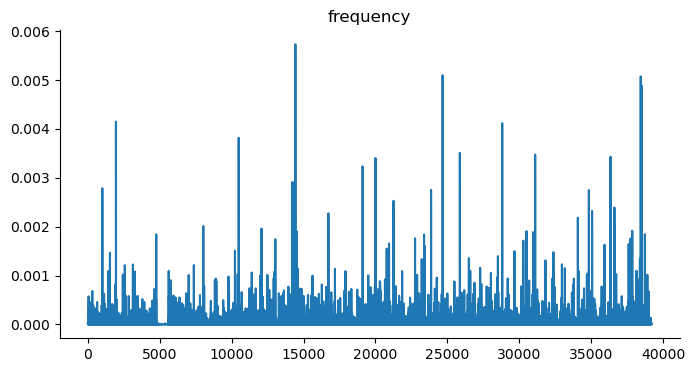

In [262]:
word_freq_df['frequency'].plot(kind='line',figsize=(8,4),title='frequency')
plt.gca().spines[['top','right']].set_visible(False)

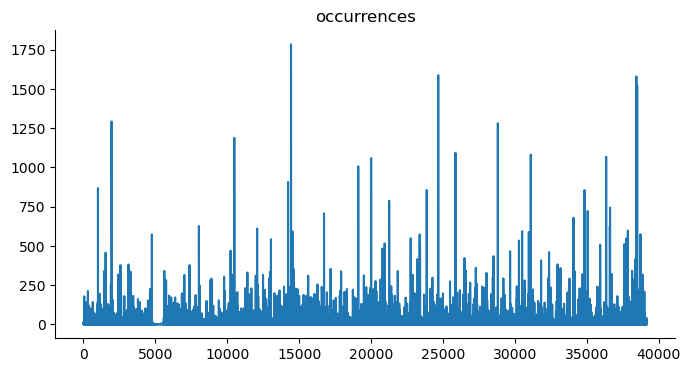

In [264]:
word_freq_df['occurrences'].plot(kind='line',figsize=(8,4),title='occurrences')
plt.gca().spines[['top','right']].set_visible(False)

#### TF-IDF : Term Frequency Inverse Document Frequency.

In [267]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [269]:
vectorizer=TfidfVectorizer(stop_words='english',max_features=1000,max_df=0.5,smooth_idf=True)
doc_vec=vectorizer.fit_transform(df["Data"])
names_features=vectorizer.get_feature_names_out()
dense=doc_vec.todense()
denselist=dense.tolist()
df1=pd.DataFrame(denselist,columns=names_features)

In [271]:
df1

,able,accept,access,according,account,act,action,actions,actually,add,...,xref,yeah,year,years,yes,york,youll,young,youre,youve
0,0.0,0.053795,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.045314,0.0,0.0,0.0,0.000000,0.057375
1,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.111891,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.108118,0.000000,0.000000,...,0.000000,0.333197,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.082636,0.000000
3,0.0,0.024288,0.0,0.0,0.023592,0.025378,0.127914,0.103619,0.038420,0.000000,...,0.000000,0.000000,0.018922,0.017126,0.122754,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.227837,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.038814,0.000000,0.000000,0.053550,0.000000,0.0,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0.0,0.000000,0.0,0.0,0.000000,0.042821,0.000000,0.000000,0.032413,0.000000,...,0.020945,0.000000,0.000000,0.028897,0.069042,0.0,0.0,0.0,0.033408,0.087420
1996,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.071218,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1997,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.096870,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000
1998,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.179264,0.113326,...,0.057918,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000


In [204]:
# Bi-gram.
def get_top_n2_words(corpus,n=None):
    vec1=CountVectorizer(ngram_range=(2,2),max_features=2000).fit(corpus)
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],reverse=True)
    return words_freq[:n]

In [273]:
top2_words=get_top_n2_words(df["Data"],n=200)
top2_df=pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram","Freq"]
top2_df.head()

,Bi-gram,Freq
0,apr gmt,1624
1,date apr,839
2,gmt lines,728
3,messageid date,617
4,xref cantaloupesrvcscmuedu,574


C:\Users\khale\AppData\Local\Temp\ipykernel_16924\2560666246.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"])


[Text(0, 0, 'apr gmt'),
 Text(1, 0, 'date apr'),
 Text(2, 0, 'gmt lines'),
 Text(3, 0, 'messageid date'),
 Text(4, 0, 'xref cantaloupesrvcscmuedu'),
 Text(5, 0, 'lines article'),
 Text(6, 0, 'references date'),
 Text(7, 0, 'messageid sender'),
 Text(8, 0, 'organization university'),
 Text(9, 0, 'writes article'),
 Text(10, 0, 'cantaloupesrvcscmuedu newsgroups'),
 Text(11, 0, 'cantaloupesrvcscmuedu path'),
 Text(12, 0, 'gmt organization'),
 Text(13, 0, 'messageid references'),
 Text(14, 0, 'gmt references'),
 Text(15, 0, 'references nntppostinghost'),
 Text(16, 0, 'fri apr'),
 Text(17, 0, 'tue apr'),
 Text(18, 0, 'date thu'),
 Text(19, 0, 'date tue')]

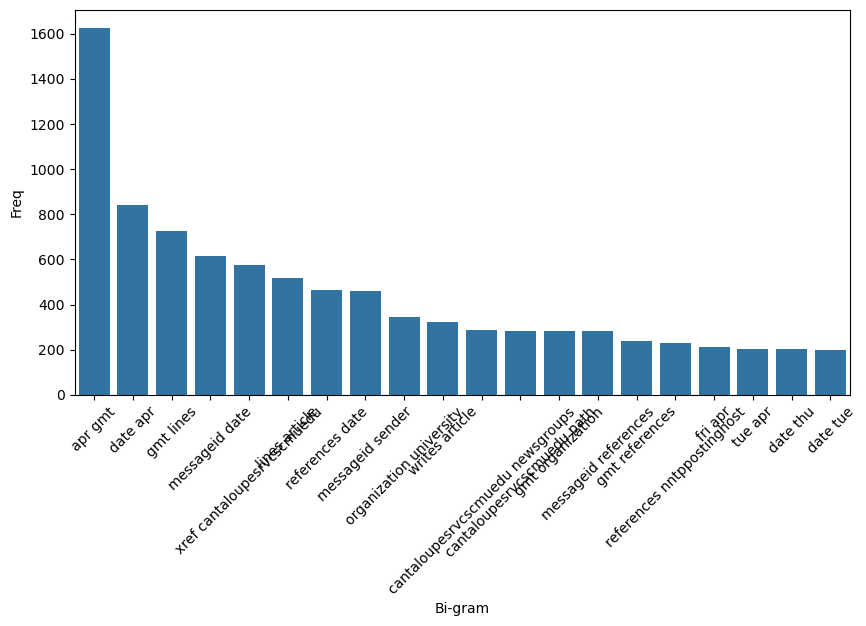

In [275]:
# Bi-gram plot.
top20_bigram=top2_df.iloc[0:20,:]
fig=plt.figure(figsize=(10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels=top20_bigram["Bi-gram"])

In [277]:
# Tri-gram.
def get_top_n3_words(corpus,n=None):
    vec1=CountVectorizer(ngram_range=(3,3),max_features=2000).fit(corpus)
    bag_of_words=vec1.transform(corpus)
    sum_words=bag_of_words.sum(axis=0)
    words_freq=[(word,sum_words[0,idx]) for word,idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1],reverse=True)
    return words_freq[:n]

In [281]:
top3_words=get_top_n3_words(df["Data"],n=200)
top3_df=pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [283]:
top3_df

,Tri-gram,Freq
0,date apr gmt,676
1,apr gmt lines,670
2,messageid date apr,452
3,gmt lines article,291
4,xref cantaloupesrvcscmuedu newsgroups,289
...,...,...
195,system organization university,15
196,computer science department,15
197,christian morality messageid,15
198,lines nntppostinghost article,15


C:\Users\khale\AppData\Local\Temp\ipykernel_16924\1970390201.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(rotation=45,labels=top20_trigram["Tri-gram"])


[Text(0, 0, 'date apr gmt'),
 Text(1, 0, 'apr gmt lines'),
 Text(2, 0, 'messageid date apr'),
 Text(3, 0, 'gmt lines article'),
 Text(4, 0, 'xref cantaloupesrvcscmuedu newsgroups'),
 Text(5, 0, 'xref cantaloupesrvcscmuedu path'),
 Text(6, 0, 'apr gmt organization'),
 Text(7, 0, 'apr gmt references'),
 Text(8, 0, 'messageid references nntppostinghost'),
 Text(9, 0, 'date fri apr'),
 Text(10, 0, 'fri apr gmt'),
 Text(11, 0, 'date tue apr'),
 Text(12, 0, 'date thu apr'),
 Text(13, 0, 'tue apr gmt'),
 Text(14, 0, 'thu apr gmt'),
 Text(15, 0, 'date wed apr'),
 Text(16, 0, 'wed apr gmt'),
 Text(17, 0, 'date mon apr'),
 Text(18, 0, 'mon apr gmt'),
 Text(19, 0, 'lines messageid references')]

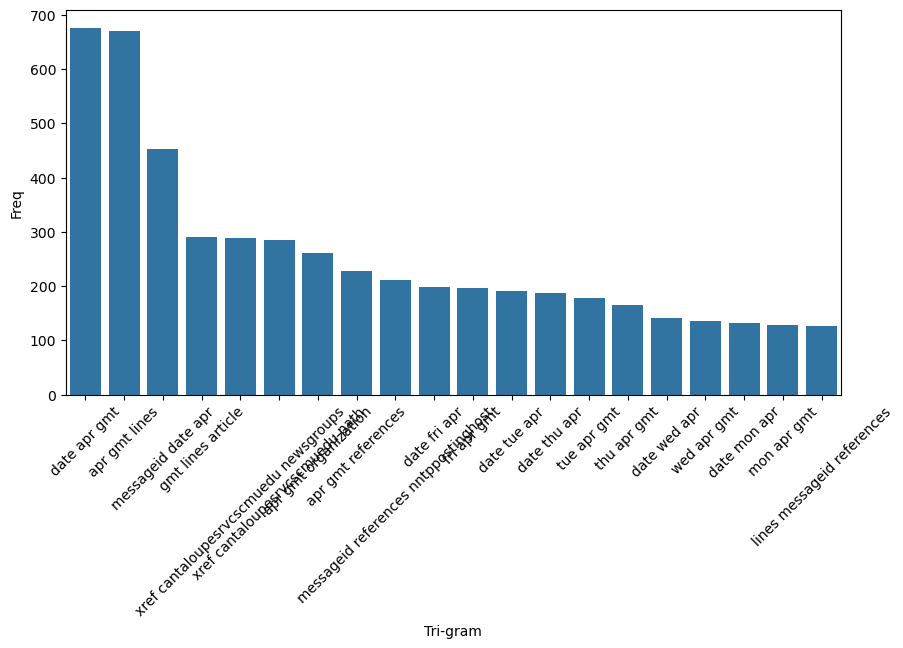

In [285]:
#Tri-gram plot.
import seaborn as sns
top20_trigram=top3_df.iloc[0:20,:]
fig=plt.figure(figsize=(10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels=top20_trigram["Tri-gram"])

### WordCloud

In [296]:
string_Total=" ".join(df["Data"])

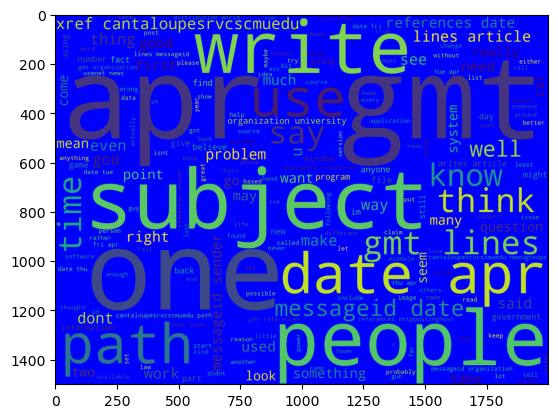

In [302]:
# WordCloud for entire corpus.
from wordcloud import WordCloud
import string
wordcloud_stw=WordCloud(
    background_color='blue',
    width=2000,
    height=1500).generate(string_Total)
plt.imshow(wordcloud_stw)

In [300]:
df.head()

,Data,Labels
0,path frank odwyer newsgroups altatheism subjec...,alt.atheism
1,newsgroups altatheism path bilokcforumosrheedu...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path jbrownbatmanbmdtrwcom newsgroups altathei...,alt.atheism
4,xref cantaloupesrvcscmuedu newsgroups altathei...,alt.atheism


In [304]:
def split_into_words(i):
    return (i.split(" "))

### Task-2 Naive Bayes Model for Text Classification1. 	Split the data into training and test sets
2. •	Implement a Naive Bayes classifier to categorize the blog posts into their respective categorie. You can use libraries like scikit-learn for this purpos
3. 
•	Train the model on the training set and make predictions on the test set.


In [309]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df,test_size=0.3)

In [311]:
df_train

,Data,Labels
1778,path cantaloupesrvcscmuedumagnesiumclubcccmued...,talk.politics.mideast
1447,newsgroups scispace path cantaloupesrvcscmuedu...,sci.space
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
1984,xref cantaloupesrvcscmuedu path frank odwyer n...,talk.religion.misc
1829,xref cantaloupesrvcscmuedu path steven e soar ...,talk.politics.misc
...,...,...
868,newsgroups recmotorcycles path davidedcsqmwacu...,rec.motorcycles
1696,path ccdargdctacuk alan greig newsgroups talkp...,talk.politics.guns
1858,xref cantaloupesrvcscmuedu path dreitmanoregon...,talk.politics.misc
201,path rttimmeemoryedu dr richard timmer newsgro...,comp.os.ms-windows.misc


In [313]:
# Preparing email texts into word count matrix format.
df_bow=CountVectorizer(analyzer=split_into_words).fit(df.Data)

In [315]:
# For all messages.
all_df_matrix=df_bow.transform(df.Data)
all_df_matrix.shape

(2000, 39214)

In [317]:
# For training messages.
train_df_matrix=df_bow.transform(df_train.Data)
print(train_df_matrix.shape)

# For testing messages.
test_df_matrix=df_bow.transform(df_test.Data)
print(test_df_matrix.shape)

(1400, 39214)
(600, 39214)


## Naive Bayes Model Without TFIDF matrices.

In [320]:
from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

In [326]:
# Multinomial Naive Bayes
classifier_mb=MB()
classifier_mb.fit(train_df_matrix,df_train.Labels)
train_pred_m=classifier_mb.predict(train_df_matrix)
accuracy_train_m=np.mean(train_pred_m==df_train.Labels)
accuracy_train_m

0.9964285714285714

In [328]:
test_pred_m=classifier_mb.predict(test_df_matrix)
accuracy_test_m=np.mean(test_pred_m==df_test.Labels)
accuracy_test_m

0.7166666666666667

## Gaussian Naive Bayes

In [335]:
classifier_gb=GB()
classifier_gb.fit(train_df_matrix.toarray(),df_train.Labels.values)
train_pred_g=classifier_gb.predict(train_df_matrix.toarray())
accuracy_train_g=np.mean(train_pred_g==df_train.Labels)

In [337]:
accuracy_train_g

1.0

In [339]:
test_pred_g=classifier_gb.predict(test_df_matrix.toarray())
accuracy_test_g=np.mean(test_pred_g==df_test.Labels)
accuracy_test_g

0.645

## Naive Bayes Model Using TFIDF matrices.

In [342]:
from sklearn.feature_extraction.text import TfidfTransformer

In [344]:
# Learning Term weighting and normalizing on entire emails
tfidf_transformer=TfidfTransformer().fit(all_df_matrix)
# Preparing TFIDF for train emails
train_tfidf=tfidf_transformer.transform(train_df_matrix)
print(train_tfidf.shape)
# Preparing TFIDF for test emails
test_tfidf=tfidf_transformer.transform(test_df_matrix)
print(test_tfidf.shape)

(1400, 39214)
(600, 39214)


In [346]:
# Multinomial Naive Bayes
classifier_mb=MB()
classifier_mb.fit(train_tfidf,df_train.Labels)
train_pred_m=classifier_mb.predict(train_tfidf)
accuracy_train_m=np.mean(train_pred_m==df_train.Labels)

In [348]:
accuracy_train_m

0.9921428571428571

In [350]:
test_pred_m=classifier_mb.predict(test_tfidf)
accuracy_test_m=np.mean(test_pred_m==df_test.Labels)

In [352]:
accuracy_test_m

0.7866666666666666

## Gaussian Naive Bayes

In [355]:
# we need to convert tfidf into array format which is compatible for gaussian naive bayesclassifier_gb=GB().
classifier_gb.fit(train_tfidf.toarray(),df_train.Labels.values)
train_pred_g=classifier_gb.predict(train_tfidf.toarray())

In [356]:
accuracy_train_g=np.mean(train_pred_g==df_train.Labels)
test_pred_g=classifier_gb.predict(test_tfidf.toarray())
accuracy_test_g=np.mean(test_pred_g==df_test.Labels)

In [359]:
accuracy_train_g

1.0

In [361]:
accuracy_test_g

0.6333333333333333

### Task-3 Sentiment Analysis
1. 	Choose a suitable library or method for performing sentiment analysis on the blog post texts
2. •	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blo
3. 
•	Examine the distribution of sentiments across different categories and summarize your findings.


In [364]:
from textblob import TextBlob

In [366]:
def get_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'

df['Sentiment']=df['Data'].apply(get_sentiment)


In [368]:
sentiment_dist=df.groupby('Labels')['Sentiment'].value_counts(normalize=True)
sentiment_dist

Labels                    Sentiment
alt.atheism               Positive     0.65
                          Negative     0.35
comp.graphics             Positive     0.73
                          Negative     0.27
comp.os.ms-windows.misc   Positive     0.76
                          Negative     0.24
comp.sys.ibm.pc.hardware  Positive     0.81
                          Negative     0.19
comp.sys.mac.hardware     Positive     0.74
                          Negative     0.26
comp.windows.x            Positive     0.77
                          Negative     0.21
                          Neutral      0.02
misc.forsale              Positive     0.79
                          Negative     0.21
rec.autos                 Positive     0.76
                          Negative     0.24
rec.motorcycles           Positive     0.71
                          Negative     0.29
rec.sport.baseball        Positive     0.65
                          Negative     0.35
rec.sport.hockey          Positive     0

### Task-4 Evaluation
1. 	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score
2. •	Discuss the performance of the model and any challenges encountered during the classification proces
3. 
•	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


In [371]:
from sklearn.metrics import accuracy_score,classification_report

In [377]:
accuracy_score(df_test.Labels,test_pred_m)

0.7866666666666666

In [381]:
print(classification_report(df_test.Labels,test_pred_m))

                          precision    recall  f1-score   support

             alt.atheism       0.73      0.48      0.58        33
           comp.graphics       0.83      0.83      0.83        29
 comp.os.ms-windows.misc       0.68      0.93      0.79        28
comp.sys.ibm.pc.hardware       0.51      0.79      0.62        29
   comp.sys.mac.hardware       0.96      0.69      0.80        35
          comp.windows.x       0.92      0.89      0.91        27
            misc.forsale       0.85      0.58      0.69        38
               rec.autos       0.86      0.76      0.81        33
         rec.motorcycles       0.93      0.90      0.92        30
      rec.sport.baseball       0.86      0.86      0.86        29
        rec.sport.hockey       0.80      1.00      0.89        24
               sci.crypt       0.86      0.83      0.85        30
         sci.electronics       0.88      0.42      0.57        36
                 sci.med       0.67      1.00      0.80        20
         